In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


We can see the median value of homeowner homes is around 20 with several outliers above 40.


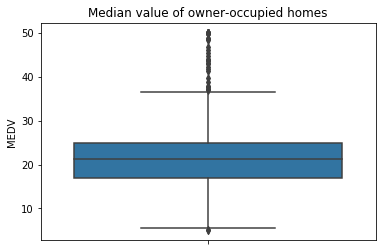

In [10]:
median_homeowners = sns.boxplot(y = 'MEDV', data = boston_df)
median_homeowners.set_title('Median value of owner-occupied homes')
print('We can see the median value of homeowner homes is around 20 with several outliers above 40.')

Text(0.5, 1.0, 'Charles river variable')

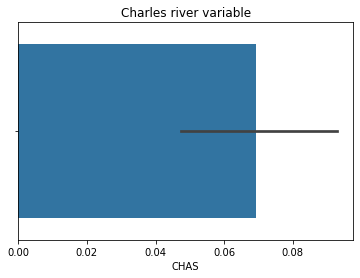

In [11]:
charles_river = sns.barplot(x = 'CHAS',data = boston_df)
charles_river.set_title('Charles river variable')

The median values for all age groups are around the 20 to 30 range. 
Also, it seems that the older the homeowner is the more outliers there are.


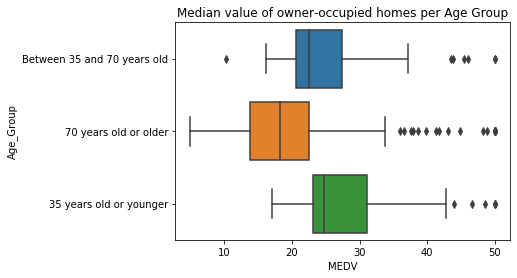

In [35]:
boston_df.loc[(boston_df['AGE'] <=35), 'Age_Group'] = '35 years old or younger'
boston_df.loc[(boston_df['AGE'] >35 ) & (boston_df['AGE'] < 70), 'Age_Group'] = 'Between 35 and 70 years old'
boston_df.loc[(boston_df['AGE'] >=70), 'Age_Group'] = '70 years old or older'

age = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
age.set_title('Median value of owner-occupied homes per Age Group')

print('The median values for all age groups are around the 20 to 30 range. \nAlso, it seems that the older the homeowner is the more outliers there are.')

There seems to be a small positive trend between Nitric Oxide Concentration and Non-Retail business acres per town.
Meaning there is a correlation between the more acres a non-retail has the more nitric oxide there is.


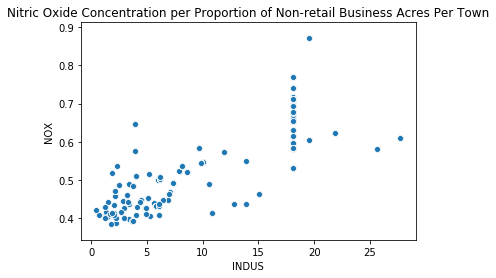

In [15]:
nitric = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
nitric.set_title('Nitric Oxide Concentration per Proportion of Non-retail Business Acres Per Town')

print('There seems to be a small positive trend between Nitric Oxide Concentration and Non-Retail business acres per town.\nMeaning there is a correlation between the more acres a non-retail has the more nitric oxide there is.')

There seems to be one major outlier other than that the histogram seems rather uniform with most under 40.


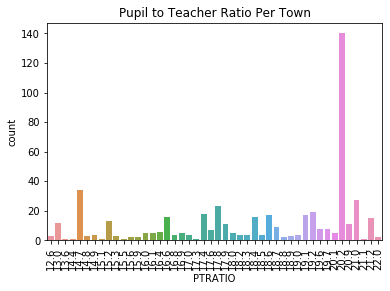

In [16]:
stuvteach = sns.countplot(x = 'PTRATIO', data = boston_df)
stuvteach.set_title('Pupil to Teacher Ratio Per Town')
stuvteach.set_xticklabels(stuvteach.get_xticklabels(), rotation=90)

print('There seems to be one major outlier other than that the histogram seems rather uniform with most under 40.')

In [25]:
print('Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?')

print('\nH_0 : \u03BC_1 = \u03BC_2 (means no difference between the median values of houses bounded by the Charles river or not bounded)')
print('\nH_a : \u038C_1 != \u03BC_2 (means there is a difference of median values between bounded and unbounded)')

scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV, boston_df[boston_df.CHAS == 0].MEDV)



Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?

H_0 : μ_1 = μ_2 (means no difference between the median values of houses bounded by the Charles river or not bounded)

H_a : Ό_1 != μ_2 (means there is a difference of median values between bounded and unbounded)


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [26]:
print('With an \u03B1 = .05, we will reject the null hypothesis as our p-value is smaller than .05. This mean there is a difference of median values between bounded and unbounded.')

With an α = .05, we will reject the null hypothesis as our p-value is smaller than .05. This mean there is a difference of median values between bounded and unbounded.


In [39]:
print('Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?')

print('\nH_0 : \u03BC_1 = \u03BC_2 (There is no difference in median values of houses for occupied units built prior to 1940)')
print('\nH_a : \u03BC_1 != \u03BC_2 (There is a difference in median values.)')

#before_1940 = boston_df.loc[(boston_df.AGE > 81), 'age_span'] note: doesn't work
#after_1940 = boston_df.loc[(boston_df.AGE <= 81), 'age_span']

#young = boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
#old = boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

#scipy.stats.f_oneway(young,old,axis = 0)

ages = [boston_df[boston_df['Age_Group'] == group]['MEDV'] for group in boston_df['Age_Group'].unique()]

scipy.stats.f_oneway(*ages)


Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

H_0 : μ_1 = μ_2 (There is no difference in median values of houses for occupied units built prior to 1940)

H_a : μ_1 != μ_2 (There is a difference in median values.)


F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

In [40]:
print('Since our p-value is smaller than .05, we reject the null hypothesis. That means there is a difference in median values for occupied units built prior to 1940')

Since our p-value is smaller than .05, we reject the null hypothesis. That means there is a difference in median values for occupied units built prior to 1940


In [44]:
print('Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?')

print('\nH_0 : There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.')
print('\nH_a : There is a relationship.')

scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

H_0 : There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

H_a : There is a relationship.


(0.763651446920915, 7.913361061239593e-98)

In [43]:
print('Since our p-value is smaller than .05, we reject the null hypothesis. There is a relationship between the Nitric oxide concentrations and the proportion of non-retail business acres per town.')

Since our p-value is smaller than .05, we reject the null hypothesis. There is a relationship between the Nitric oxide concentrations and the proportion of non-retail business acres per town.


In [49]:
print('Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?')

print('\nH_0 : There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.')
print('\nH_a : There is an impact.')

x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)

regmodel = sm.OLS(y, x).fit()

regmodel.summary()

Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

H_0 : There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

H_a : There is an impact.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        21:23:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
print('Since the p-value = 1.21e-08 is smaller than .05, we reject the null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centres. It is about 1.0916.')

Since the p-value = 1.21e-08 is smaller than .05, we reject the null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centres. It is about 1.0916.


In [1]:
nbformat

NameError: name 'nbformat' is not defined